In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, OneHotEncoder , StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.impute import SimpleImputer

In [ ]:
# Load the dataset
data = pd.read_csv('Frogs_MFCCs.csv')

In [ ]:
# Check for missing values
def check_missing_values(data):
    print("Missing values in each column:")
    print(data.isnull().sum())

check_missing_values(data)

Missing values in each column:
MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64


In [ ]:
# Standardize numeric features
def standardize_data(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Numeric columns for standardization: {numeric_cols}")

    # Standardizing the numeric columns in a single step
    data[numeric_cols] = StandardScaler().fit_transform(data[numeric_cols])
    return data

# Standardize the data
data_standardized = standardize_data(data)

Numeric columns for standardization: ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'RecordID']


In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Generate and append polynomial features
def create_polynomial_features(data, degree=2):
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    poly = PolynomialFeatures(degree=degree, interaction_only=False, include_bias=False)

    # Create polynomial features
    poly_features = poly.fit_transform(data[numeric_cols])

    # Create a DataFrame with new feature names
    poly_feature_names = poly.get_feature_names_out(numeric_cols)
    poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names)

    # Append polynomial features to the original data
    data_with_poly_features = pd.concat([data.reset_index(drop=True), poly_features_df.reset_index(drop=True)], axis=1)

    return data_with_poly_features

# Create polynomial features and append them to the standardized data
data_with_poly_features = create_polynomial_features(data_standardized)

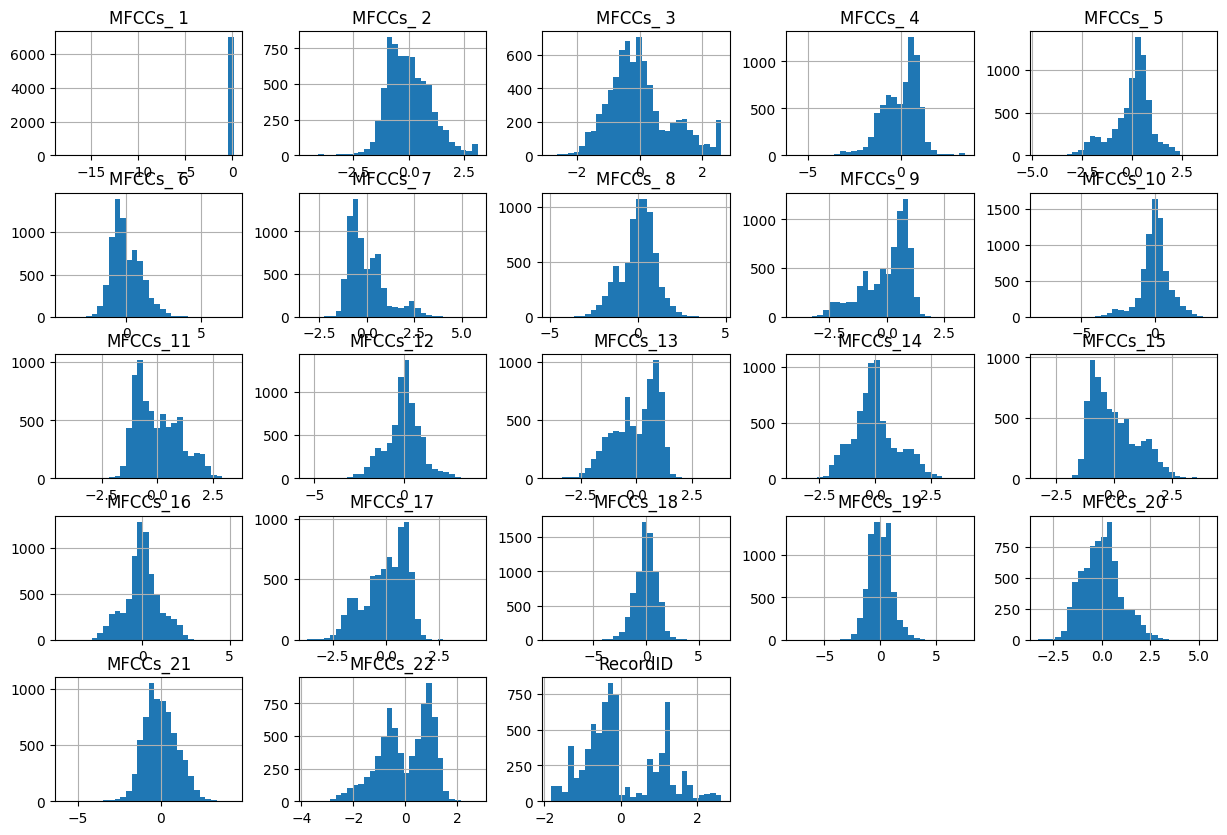

In [ ]:
# Visualize feature distributions using histograms
def plot_feature_distributions(data):
    data.hist(figsize=(15, 10), bins=30)
    plt.show()

plot_feature_distributions(data)

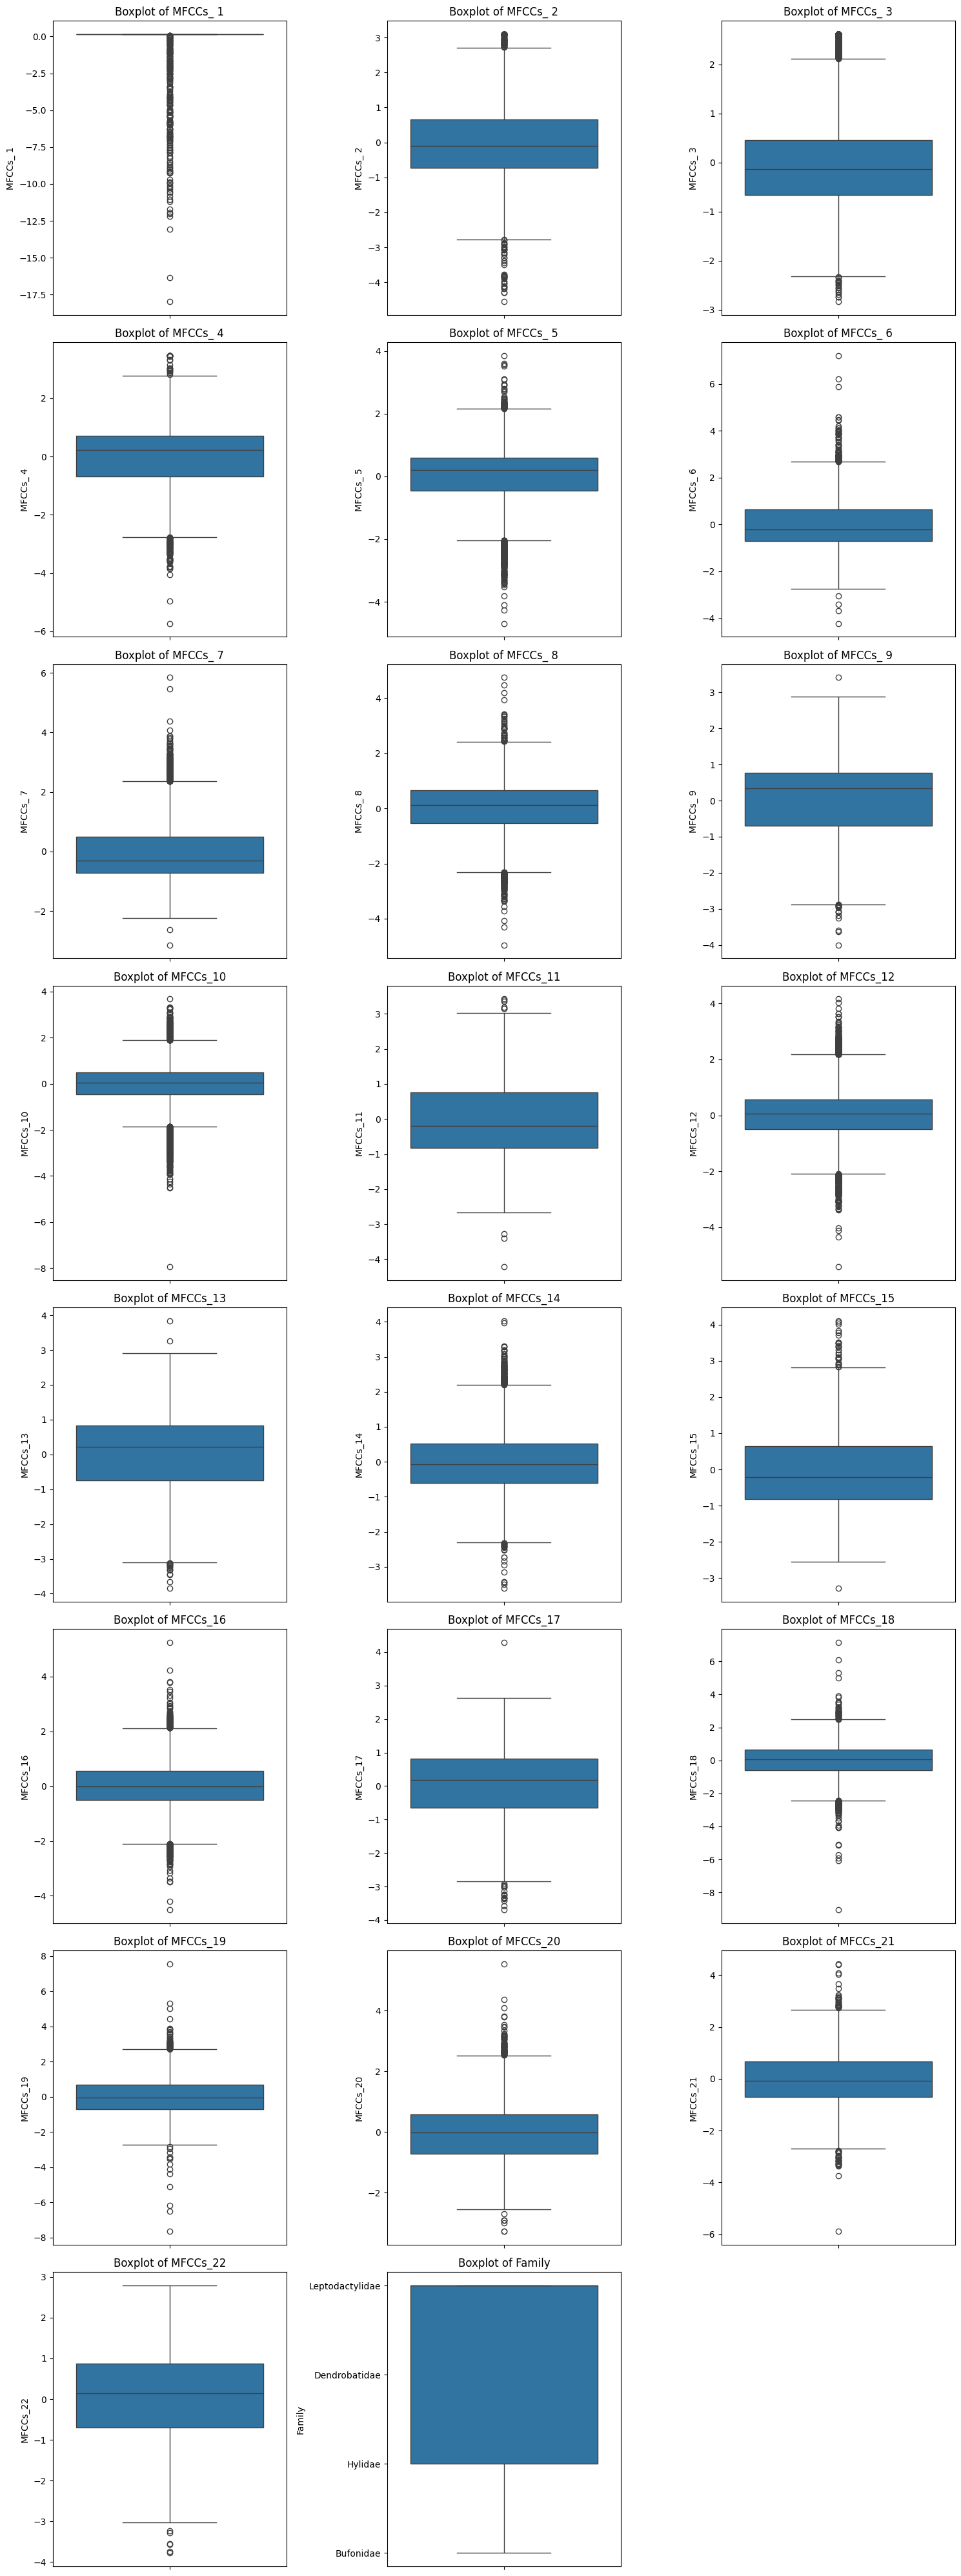

In [ ]:
# Identify and visualize outliers using boxplots
def plot_boxplots(data):
    numeric_cols = data.columns[:-3]  # Exclude the last three label columns
    num_cols = len(numeric_cols)

    # Set the number of rows and columns for subplots
    ncols = 3  # Number of columns for boxplots
    nrows = (num_cols + ncols - 1) // ncols  # Calculate rows needed

    plt.figure(figsize=(15, nrows * 5))  # Adjust the height based on the number of rows
    for i, column in enumerate(numeric_cols):
        plt.subplot(nrows, ncols, i + 1)
        sns.boxplot(data[column])
        plt.title(f'Boxplot of {column}')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Call the modified boxplot function
plot_boxplots(data)


In [ ]:
# Handle Categorical Features
def encode_categorical_features(data):
    categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical columns identified: {categorical_cols}")
    return pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data_encoded = encode_categorical_features(data)

Categorical columns identified: ['Family', 'Genus', 'Species']


In [ ]:
# Data Scaling
def scale_data(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Numeric columns for scaling: {numeric_cols}")

    # Create an imputer to fill NaN values with the mean
    imputer = SimpleImputer(strategy='mean')
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

data_scaled = scale_data(data_encoded)

Numeric columns for scaling: ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'RecordID']


In [ ]:
# # Feature Engineering: Create Polynomial Features
# def create_polynomial_features(data):
#     poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
#     poly_features = poly.fit_transform(data)
#     return pd.DataFrame(poly_features, columns=poly.get_feature_names_out(data.columns))

# poly_features_df = create_polynomial_features(data_scaled)

In [ ]:
# Remove highly correlated features
def remove_high_correlation_features(data, threshold=0.9):
    correlation_matrix = data.corr()
    to_drop = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                if colname not in to_drop:
                    to_drop.append(colname)
    print(f'Removed features: {to_drop}')
    return data.drop(columns=to_drop)

poly_features_df = data_scaled
data_reduced = remove_high_correlation_features(data_scaled)

Removed features: ['MFCCs_15']


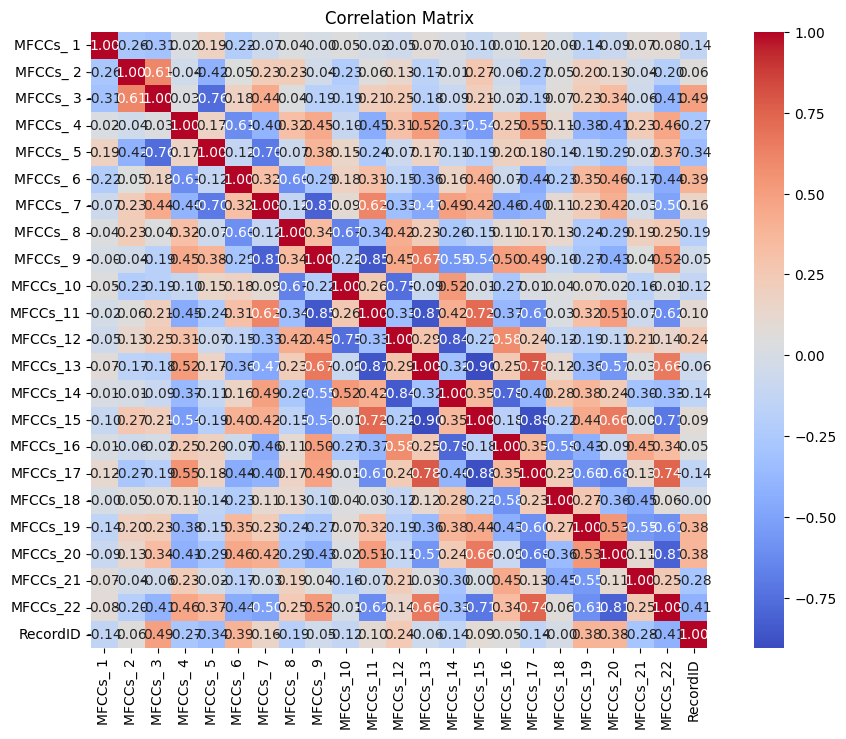

In [ ]:
    # Step 5: Feature Correlation Analysis
# Calculate the correlation matrix
correlation_matrix = poly_features_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

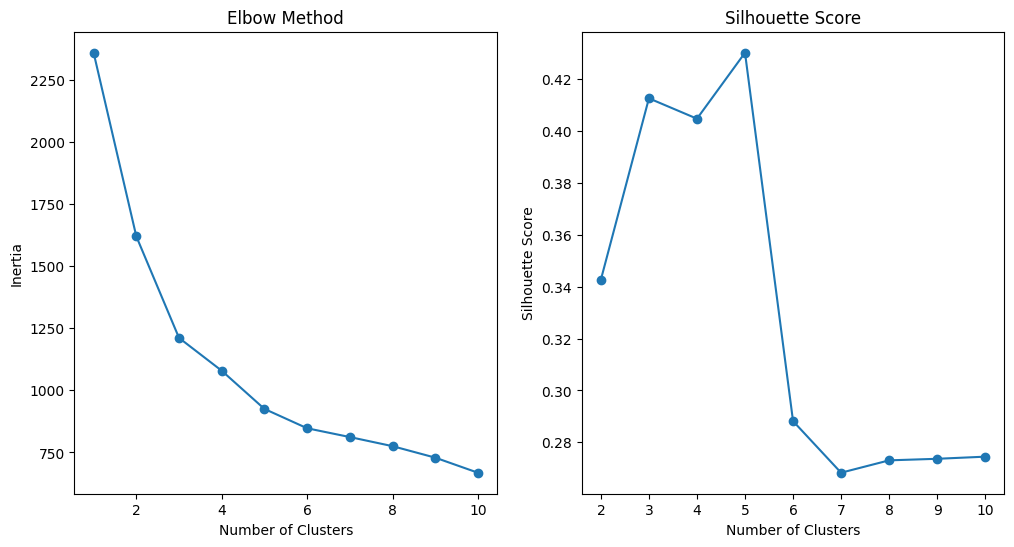

In [ ]:
# Elbow Method for Optimal Clusters
def elbow_method(data, max_clusters=10):
    inertia = []
    silhouette_scores = []

    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

        if n_clusters > 1:
            silhouette_avg = silhouette_score(data, kmeans.labels_)
            silhouette_scores.append(silhouette_avg)
        else:
            silhouette_scores.append(0)

    # Plotting the elbow method results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores[1:], marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    return inertia, silhouette_scores

inertia, silhouette_scores = elbow_method(data_reduced)

# Optimal number of clusters from Elbow Method
optimal_clusters = 4  # Update this based on your elbow plot observation

In [ ]:
def evaluate_additional_metrics(data, labels):
    """
    Calculates the Davies-Bouldin Index and Calinski-Harabasz Index.

    Args:
        data: The data used for clustering.
        labels: The cluster labels assigned by the clustering algorithm.

    Returns:
        A tuple containing the Davies-Bouldin Index and Calinski-Harabasz Index.
    """
    db_index = davies_bouldin_score(data, labels)
    ch_index = calinski_harabasz_score(data, labels)
    return db_index, ch_index

In [ ]:
# K-Means clustering with optimal clusters
def perform_kmeans_clustering(data, n_clusters, init_method='k-means++'):
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, random_state=70)
    return kmeans.fit_predict(data)

kmeans_labels = perform_kmeans_clustering(data_reduced, optimal_clusters)

kmeans_silhouette_avg = evaluate_clustering(data_reduced, kmeans_labels)
kmeans_db_index, kmeans_ch_index = evaluate_additional_metrics(data_reduced, kmeans_labels)

Silhouette Score for 4 clusters: 0.4053
Davies-Bouldin Index: 1.2665
Calinski-Harabasz Index: 2843.0254


In [ ]:
# Compare initialization methods
def compare_initialization_methods(data, n_clusters):
    init_methods = ['random', 'k-means++']
    results = {}

    for init_method in init_methods:
        labels = perform_kmeans_clustering(data, n_clusters, init_method)
        silhouette_avg = silhouette_score(data, labels)
        results[init_method] = silhouette_avg
        print(f'Silhouette Score with {init_method} initialization: {silhouette_avg:.4f}')

    return results

init_results = compare_initialization_methods(data_reduced, optimal_clusters)

Silhouette Score with random initialization: 0.4297
Silhouette Score with k-means++ initialization: 0.4053


In [ ]:
# Evaluate clustering performance with the optimal number of clusters
cluster_labels = perform_kmeans_clustering(data_reduced, optimal_clusters)
def evaluate_clustering(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg:.4f}')
    db_index = davies_bouldin_score(data, labels)
    ch_index = calinski_harabasz_score(data, labels)

    # Print evaluation metrics with formatting
    print(f'Davies-Bouldin Index: {db_index:.4f}')
    print(f'Calinski-Harabasz Index: {ch_index:.4f}')

    return silhouette_avg, db_index, ch_index

silhouette_avg, db_index, ch_index = evaluate_clustering(data_reduced, cluster_labels)

Silhouette Score for 4 clusters: 0.4053
Davies-Bouldin Index: 1.2665
Calinski-Harabasz Index: 2843.0254


In [ ]:
# Dimensionality Reduction using PCA for Visualization
def reduce_dimensions_with_pca(data):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    return pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

pca_df = reduce_dimensions_with_pca(data_reduced)

In [ ]:
from sklearn.manifold import TSNE
# Dimensionality Reduction using t-SNE for Visualization
def reduce_dimensions_with_tsne(data):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(data)
    return pd.DataFrame(data=tsne_result, columns=['tSNE1', 'tSNE2'])

tsne_df = reduce_dimensions_with_tsne(data_reduced)

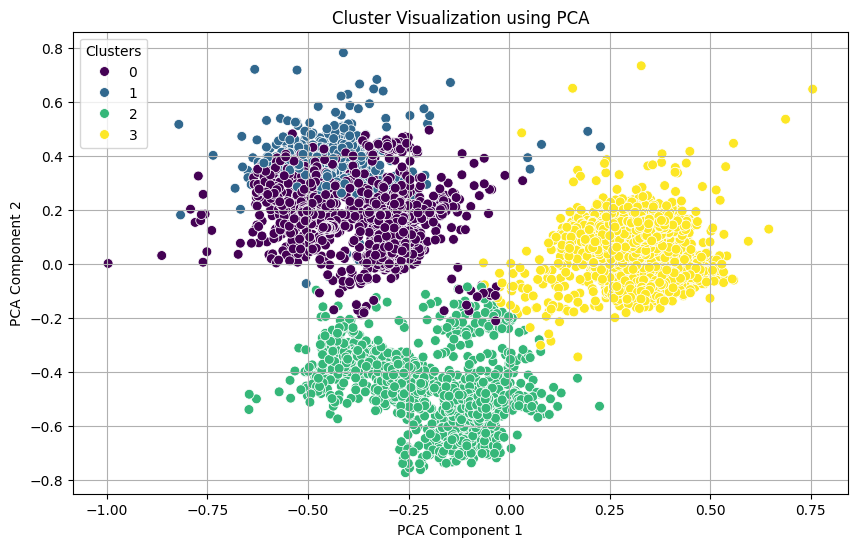

In [ ]:
# Visualize clusters using PCA
def visualize_clusters_pca(pca_df, cluster_labels):
    pca_df['Cluster'] = cluster_labels
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=50)
    plt.title('Cluster Visualization using PCA')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Clusters')
    plt.grid(True)
    plt.show()

visualize_clusters_pca(pca_df, cluster_labels)

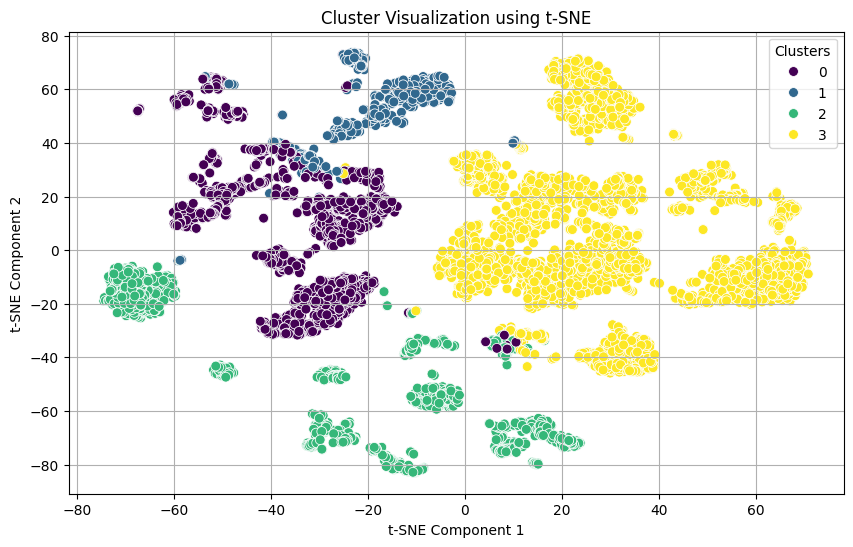

In [ ]:
# Visualize clusters using t-SNE
def visualize_clusters_tsne(tsne_df, cluster_labels):
    tsne_df['Cluster'] = cluster_labels
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='tSNE1', y='tSNE2', hue='Cluster', data=tsne_df, palette='viridis', s=50)
    plt.title('Cluster Visualization using t-SNE')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Clusters')
    plt.grid(True)
    plt.show()

visualize_clusters_tsne(tsne_df, cluster_labels)


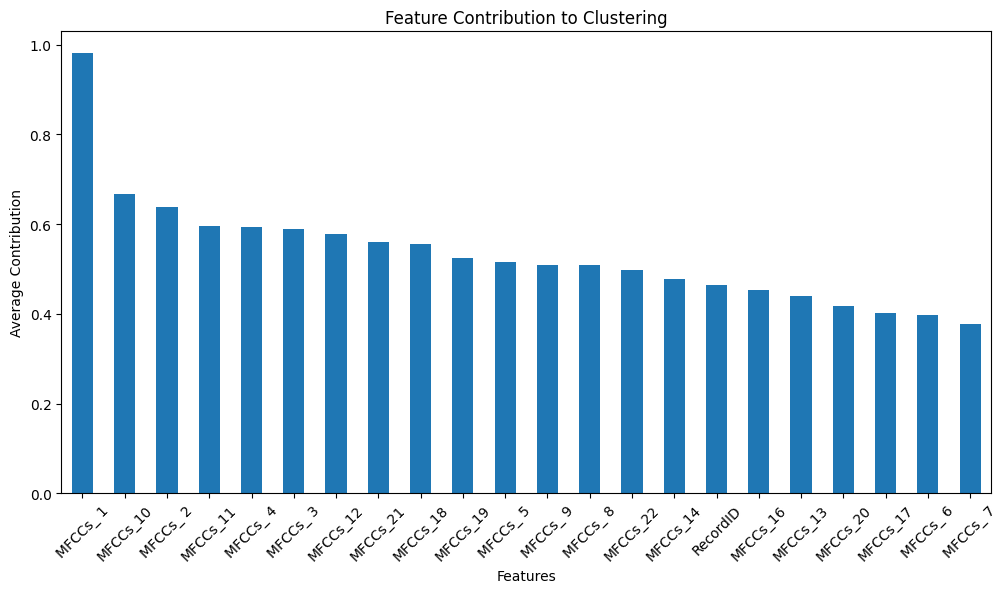

In [ ]:
# Analyze Feature Contribution to Clustering
def analyze_feature_contribution(data, labels):
    cluster_centers = pd.DataFrame(KMeans(n_clusters=optimal_clusters, random_state=42).fit(data).cluster_centers_,
                                   columns=data.columns)
    contribution = cluster_centers.mean(axis=0).sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    contribution.plot(kind='bar')
    plt.title('Feature Contribution to Clustering')
    plt.xlabel('Features')
    plt.ylabel('Average Contribution')
    plt.xticks(rotation=45)
    plt.show()

analyze_feature_contribution(data_reduced, cluster_labels)

In [ ]:
# Cluster Evaluation Metrics for Different Cluster Sizes
def evaluate_cluster_range(data):
    cluster_range = range(2, 11)
    metrics = {'Davies-Bouldin': [], 'Calinski-Harabasz': [], 'Silhouette': []}

    for n_clusters in cluster_range:
        cluster_labels = perform_kmeans_clustering(data, n_clusters)
        metrics['Davies-Bouldin'].append(davies_bouldin_score(data, cluster_labels))
        metrics['Calinski-Harabasz'].append(calinski_harabasz_score(data, cluster_labels))
        metrics['Silhouette'].append(silhouette_score(data, cluster_labels))

    return metrics, cluster_range

metrics, cluster_range = evaluate_cluster_range(data_reduced)

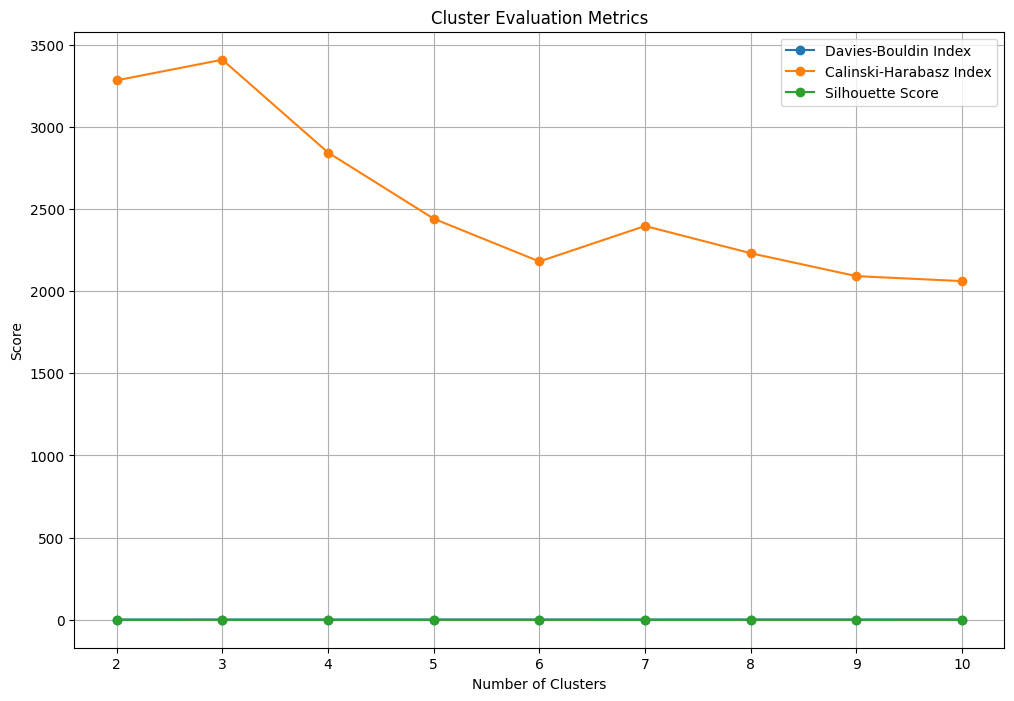

In [ ]:
# Visualize the evaluation metrics
def plot_evaluation_metrics(metrics, cluster_range):
    plt.figure(figsize=(12, 8))
    plt.plot(cluster_range, metrics['Davies-Bouldin'], marker='o', label='Davies-Bouldin Index')
    plt.plot(cluster_range, metrics['Calinski-Harabasz'], marker='o', label='Calinski-Harabasz Index')
    plt.plot(cluster_range, metrics['Silhouette'], marker='o', label='Silhouette Score')
    plt.title('Cluster Evaluation Metrics')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.xticks(cluster_range)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_evaluation_metrics(metrics, cluster_range)


Silhouette Score for 4 clusters: 0.4229
Davies-Bouldin Index: 1.1354
Calinski-Harabasz Index: 2847.4766


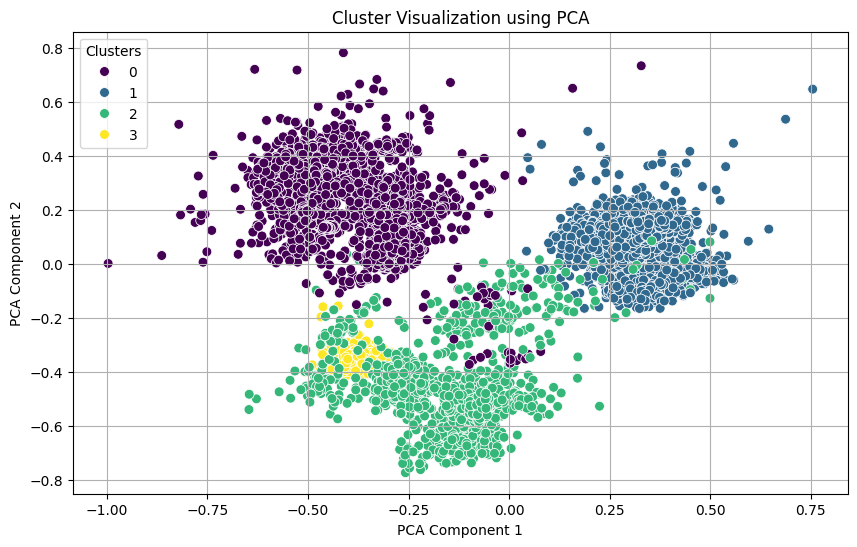

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Apply Agglomerative Hierarchical Clustering
def perform_agglomerative_clustering(data, n_clusters):
    agglom = AgglomerativeClustering(n_clusters=n_clusters)
    return agglom.fit_predict(data)

# Perform Agglomerative clustering
agglom_labels = perform_agglomerative_clustering(data_reduced, optimal_clusters)

# Evaluate Agglomerative clustering performance
agglom_silhouette_avg = evaluate_clustering(data_reduced, agglom_labels)
agglom_db_index, agglom_ch_index = evaluate_additional_metrics(data_reduced, agglom_labels)

# Visualize Agglomerative clustering results
visualize_clusters_pca(pca_df, agglom_labels)

Silhouette Score for 4 clusters: 0.2395
Davies-Bouldin Index: 2.3840
Calinski-Harabasz Index: 37.3442


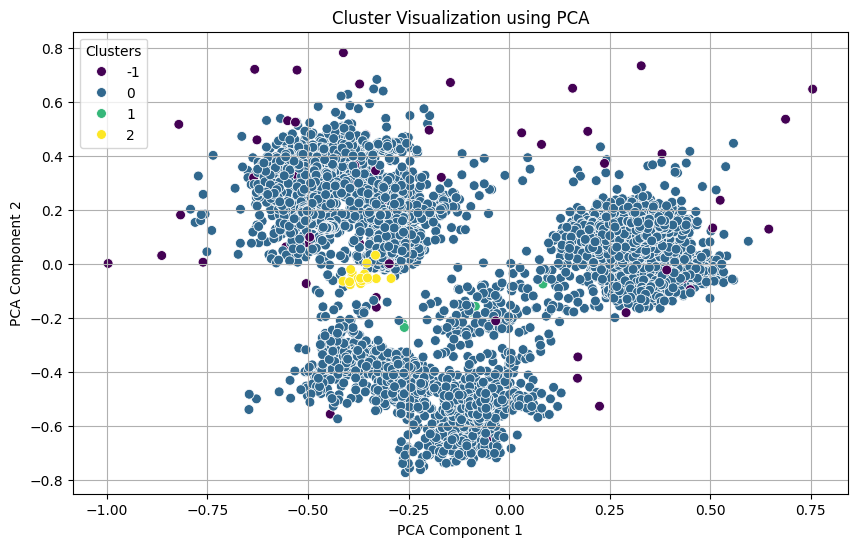

In [ ]:
# Apply DBSCAN
def perform_dbscan(data):
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # Hyperparameters can be tuned
    return dbscan.fit_predict(data)

# Perform DBSCAN clustering
dbscan_labels = perform_dbscan(data_reduced)

# Evaluate DBSCAN clustering performance
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette_avg = evaluate_clustering(data_reduced, dbscan_labels)
    dbscan_db_index, dbscan_ch_index = evaluate_additional_metrics(data_reduced, dbscan_labels)
else:
    dbscan_silhouette_avg = -1
    dbscan_db_index, dbscan_ch_index = (np.nan, np.nan)

# Visualize DBSCAN clustering results
visualize_clusters_pca(pca_df, dbscan_labels)

In [ ]:
# Compare and analyze clustering results
def compare_clustering_results():
    print("\nK-Means Results:")
    # Access the correct element of the tuple for Silhouette Score
    print(f'Silhouette Score: {kmeans_silhouette_avg[0]:.4f}, Davies-Bouldin Index: {kmeans_db_index:.4f}, Calinski-Harabasz Index: {kmeans_ch_index:.4f}')

    print("\nAgglomerative Clustering Results:")
    # Access the first element of agglom_silhouette_avg if it's a tuple
    silhouette_score = agglom_silhouette_avg[0] if isinstance(agglom_silhouette_avg, tuple) else agglom_silhouette_avg
    print(f'Silhouette Score: {silhouette_score:.4f}, Davies-Bouldin Index: {agglom_db_index:.4f}, Calinski-Harabasz Index: {agglom_ch_index:.4f}')

    if dbscan_silhouette_avg != -1:
        print("\nDBSCAN Results:")
        # Access the correct element of the tuple for Silhouette Score
        print(f'Silhouette Score: {dbscan_silhouette_avg[0]:.4f}, Davies-Bouldin Index: {dbscan_db_index:.4f}, Calinski-Harabasz Index: {dbscan_ch_index:.4f}')
    else:
        print("\nDBSCAN did not yield meaningful clusters.")

compare_clustering_results()


K-Means Results:
Silhouette Score: 0.4053, Davies-Bouldin Index: 1.2665, Calinski-Harabasz Index: 2843.0254

Agglomerative Clustering Results:
Silhouette Score: 0.4229, Davies-Bouldin Index: 1.1354, Calinski-Harabasz Index: 2847.4766

DBSCAN Results:
Silhouette Score: 0.2395, Davies-Bouldin Index: 2.3840, Calinski-Harabasz Index: 37.3442
